# GLM 負の二項分布

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
filepath = '../../../../data/processed/df_filtered_5years.xlsx'
df = pd.read_excel(filepath)
df['log_income'] = np.log(df['income'])
df = df.dropna()
df.head()

,island,year,island_id,region_code,region_name,prefecture_code,prefecture_code.1,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,JPNCPIALLAINMEI,nominal_income,log_income
2,島後,2005,0,32528,隠岐の島町,32,島根県,17259.0,0,0,0,0,0,0,196868.811077,96.93730,19083931.0,12.190293
3,島後,2010,0,32528,隠岐の島町,32,島根県,15930.0,0,0,0,0,0,0,166610.045283,96.53008,16082881.0,12.023411
4,島後,2015,0,32528,隠岐の島町,32,島根県,14901.0,0,0,0,0,0,0,161353.170000,100.00000,16135317.0,11.991351
5,島後,2020,0,32528,隠岐の島町,32,島根県,13882.0,0,0,0,0,0,0,171650.091455,101.79860,17473739.0,12.053213
6,中ノ島,1985,1,32525,海士町,32,島根県,3339.0,0,0,0,0,0,0,30999.550430,85.34827,2645758.0,10.341728


In [3]:
endog = df['population']
exog = df[['dummy_after_bridge_opened', 'log_income']]
exog = sm.add_constant(exog)

model = sm.GLM(endog, exog, family=sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             population   No. Observations:                  611
Model:                            GLM   Df Residuals:                      608
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5000.1
Date:                Wed, 09 Oct 2024   Deviance:                       2006.7
Time:                        19:56:57   Pearson chi2:                 3.80e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6770
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/home/keisei/data-analysis/bridge-straw-effects/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


## 残差分析

In [4]:
residuals = results.resid_response

In [5]:
# 変数と残差の相関
corr_log_income = np.corrcoef(df['log_income'], residuals)[0, 1]
corr_bridge = np.corrcoef(df['dummy_after_bridge_opened'], residuals)[0, 1]
coor_population = np.corrcoef(df['population'], residuals)[0, 1]

print(f'coor between log_income and residuals: {corr_log_income:.3f}')
print(f'coor between bridge and residuals: {corr_bridge:.3f}')
print(f'coor between population and residuals: {coor_population:.3f}')

coor between log_income and residuals: 0.171
coor between bridge and residuals: -0.139
coor between population and residuals: 0.782


### 残差プロット

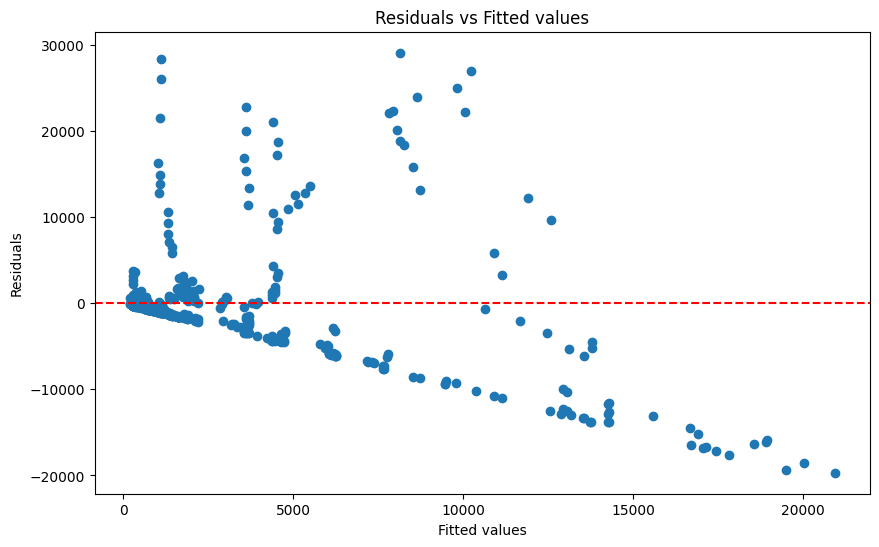

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

### 残差ヒストグラム

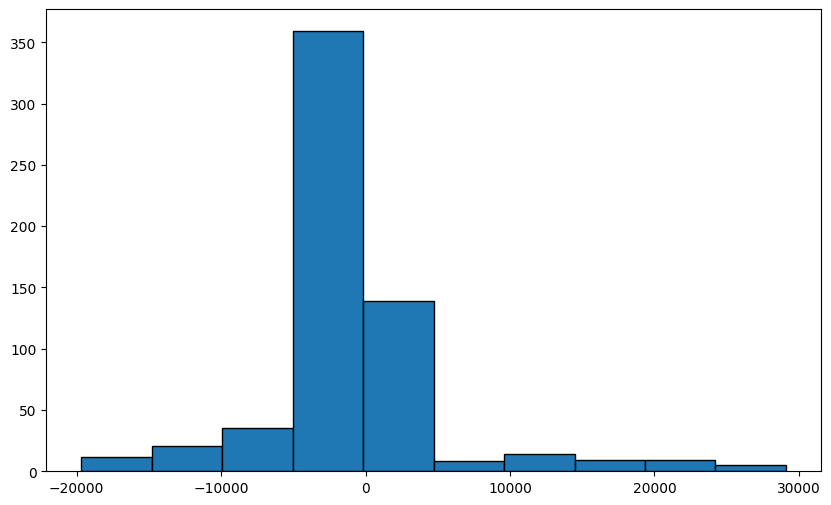

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, edgecolor='black')
plt.show()